In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), (7,7), (9,7), 
                                 (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), (12,7), (12,6), (11,6), (11,5), 
                                 (12, 5), (12,4), (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], [(13,5), (14,5)], # 대전시 #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], [(27,5), (27,6), (25,6)],
]

draw_korea_raw = {'x': np.array([ 7,  8,  9, 10,  3,  4,  5,  6,  7,  8,  9, 10,  3,  4,  5,  6,  7,
         8,  9, 10,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  2,  3,  4,  5,
         6,  7,  8,  9, 10, 11,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
         1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  1,  2,  3,  4,  5,  6,
         7,  8,  9, 10, 11,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13,  1,
         2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  1,  2,  3,  4,  5,  6,
         7,  8,  9, 10, 11, 12,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
        11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
         4,  5,  6,  7,  8,  9, 10, 11, 12,  2,  3,  4,  5,  6,  7,  8,  9,
        10, 11, 12,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  2,  3,  4,
         5,  6,  7,  8,  9, 10, 11, 12,  2,  3,  4,  5,  6,  7,  8,  9, 10,
        11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  1,  2,  3,  4,
         5,  6,  7,  8,  9, 10, 11,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
        11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  0,  1,  2,  3,  4,  5,  6,
         7,  8,  0,  1,  2,  3,  4,  0,  1,  2,  3,  2,  5,  5]),
 'y': np.array([ 0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
         2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14,
        14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17,
        17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19,
        19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
        20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22,
        22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 26]),
 'ID': np.array(['철원', '화천', '양구', '고성(강원)', '양주', '동두천', '연천', '포천', '의정부', '인제',
        '춘천', '속초', '고양 덕양', '고양 일산동', '서울 도봉', '서울 노원', '남양주', '홍천', '횡성',
        '양양', '파주', '고양 일산서', '김포', '서울 강북', '서울 성북', '가평', '구리', '하남',
        '정선', '강릉', '부천 소사', '안양 만안', '광명', '서울 서대문', '서울 종로', '서울 동대문',
        '서울 중랑', '양평', '태백', '동해', '인천 강화', '부천 원미', '안양 동안', '서울 은평',
        '서울 마포', '서울 중구', '서울 성동', '서울 강동', '여주', '원주', '삼척', '인천 서구',
        '부천 오정', '시흥', '서울 강서', '서울 동작', '서울 용산', '서울 광진', '서울 송파', '이천',
        '평창', '울진', '인천 동구', '인천 계양', '안산 상록', '서울 양천', '서울 관악', '서울 서초',
        '성남 중원', '과천', '광주', '영월', '영덕', '인천 부평', '안산 단원', '서울 영등포',
        '서울 금천', '서울 강남', '성남 분당', '성남 수정', '용인 수지', '문경', '봉화', '울릉',
        '인천 중구', '인천 남구', '화성', '서울 구로', '군포', '의왕', '수원 영통', '용인 기흥',
        '용인 처인', '안동', '영양', '인천 옹진', '인천 연수', '인천 남동', '오산', '안성', '수원 권선',
        '수원 장안', '제천', '예천', '영주', '구미', '청송', '포항 북구', '태안', '아산', '천안 동남',
        '천안 서북', '평택', '음성', '수원 팔달', '단양', '상주', '김천', '군위', '의성', '포항 남구',
        '당진', '홍성', '예산', '공주', '진천', '충주', '청주 흥덕', '괴산', '칠곡', '영천', '경산',
        '경주', '서산', '보령', '청양', '세종', '대전 대덕', '증평', '청주 청원', '보은', '고령',
        '청도', '성주', '울산 북구', '부여', '논산', '계룡', '대전 동구', '청주 상당', '청주 서원',
        '대구 북구', '대구 중구', '대구 수성', '울산 울주', '울산 동구', '서천', '금산', '대전 유성',
        '대전 중구', '옥천', '영동', '대구 서구', '대구 남구', '대구 동구', '울산 중구', '울산 남구',
        '군산', '익산', '대전 서구', '무주', '거창', '합천', '대구 달서', '대구 달성', '부산 금정',
        '부산 동래', '부산 기장', '부안', '김제', '완주', '장수', '함양', '창녕', '밀양', '부산 북구',
        '부산 부산진', '부산 연제', '부산 해운대', '고창', '정읍', '전주 덕진', '진안', '남원', '진주',
        '의령', '부산 강서', '부산 사상', '부산 동구', '부산 중구', '영광', '장성', '전주 완산', '임실',
        '산청', '함안', '양산', '창원 합포', '부산 서구', '부산 사하', '부산 남구', '함평', '담양',
        '순창', '구례', '하동', '창원 의창', '창원 성산', '창원 진해', '김해', '부산 영도', '부산 수영',
        '신안', '무안', '광주 광산', '곡성', '화순', '광양', '사천', '창원 회원', '통영', '목포',
        '나주', '광주 서구', '광주 북구', '순천', '고흥', '남해', '고성(경남)', '거제', '해남',
        '영암', '광주 남구', '광주 동구', '여수', '진도', '강진', '장흥', '보성', '완도', '제주',
        '서귀포'], dtype=object)}

draw_korea_pd = pd.DataFrame(draw_korea_raw)

def get_data_info(targetData, blockedMap):
    whitelabelmin = (max(blockedMap[targetData])-min(blockedMap[targetData]))*0.25 + min(blockedMap[targetData])
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    return masked_mapdata, vmax, vmin, whitelabelmin

def get_data_info_for_zero_center(targetData, blockedMap):
    whitelabelmin = 5
    tmp_max = max([ np.abs(min(blockedMap[targetData])),  
                                   np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    return masked_mapdata, vmax, vmin, whitelabelmin

def plot_text(targetData, blockedMap, whitelabelmin):
    for idx, row in blockedMap.iterrows():
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성': dispname = '고성'
        else: dispname = row['ID']

        if len(dispname.splitlines()[-1]) >= 3: fontsize, linespacing = 9.5, 1.5
        else:  fontsize, linespacing = 11, 1.2
            
        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold', 
                     color=annocolor, fontsize=fontsize, ha='center', va='center',  
                     linespacing=linespacing)

def plot_text_simple(draw_korea):
    for idx, row in draw_korea.iterrows():
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']
            
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                    fontsize=fontsize, ha='center', va='center',  linespacing=linespacing)

def simpleDraw(draw_korea):
    plt.figure(figsize=(8, 11))

    plot_text_simple(draw_korea)

    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=1.5)

    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def drawKorea(targetData, blockedMap, cmapname, zeroCenter=False):
    if zeroCenter:
        masked_mapdata, vmax, vmin, whitelabelmin = get_data_info_for_zero_center(targetData, blockedMap)
    if not zeroCenter:
        masked_mapdata, vmax, vmin, whitelabelmin = get_data_info(targetData, blockedMap)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    plot_text(targetData, blockedMap, whitelabelmin)

    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis(); plt.axis('off')
    cb = plt.colorbar(shrink=.1, aspect=10); cb.set_label(targetData)
    plt.tight_layout(); plt.show()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "c:/Windows/Fonts/H2HDRM.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

import drawKorea as dK

In [3]:
korea_pop = pd.read_csv('./pop_exam.csv', index_col=0)

In [5]:
korea_pop['인구대비 노인인구'] = korea_pop['65세이상합계'] / korea_pop['인구수합계']

In [6]:
small_for_map = pd.read_csv('small_for_map.csv')

In [15]:
korea_pop['인구대비취학대상자'] = small_for_map['인구대비취학대상자'] * 1000

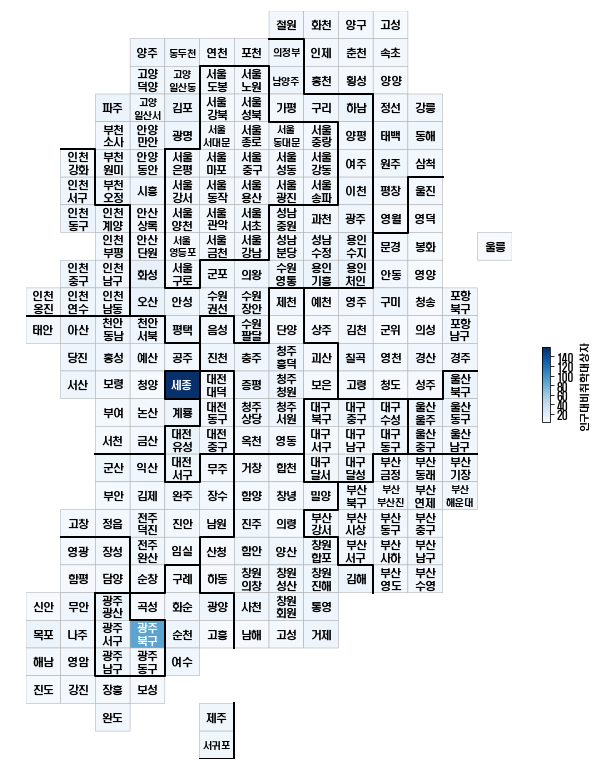

In [16]:
dK.drawKorea('인구대비취학대상자', korea_pop, 'Blues') # 2017년 기준